In [ ]:
import scanpy as sc
import leidenalg
import igraph as ig
import numpy as np

## Clustering

Clusters pretraining data (e.g. recount3) using kmeans.


In [11]:
data= sc.read_h5ad("recount3/preprocessed_mouse_gene2vec_15117_compatible_bulk_only.h5ad")

In [12]:
sc.tl.pca(data, svd_solver='arpack')

In [13]:
sc.pp.neighbors(data, n_neighbors=10, n_pcs=40)

In [14]:
sc.tl.umap(data)

/home/kli3/.conda/envs/scbert/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [82]:
# sc.tl.leiden(data, key_added = "leiden_1.0") # default resolution in 1.0

In [ ]:
# sc.tl.leiden(data, resolution = 0.6, key_added = "leiden_0.6")
# sc.tl.leiden(data, resolution = 0.4, key_added = "leiden_0.4")
# sc.tl.leiden(data, resolution = 1.4, key_added = "leiden_1.4")

In [ ]:

# # n_comms = 5
# # partition = leidenalg.CPMVertexPartition(data, 
# #                                   initial_membership=np.random.choice(n_comms, 100),
# #                                   resolution_parameter=0.5)

# sc.tl.leiden(data, resolution = 0, key_added = "leiden_0")

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
num_clusters=30

kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X_pca) 
data.obs[f"kmeans{num_clusters}"] = kmeans.labels_.astype(str)

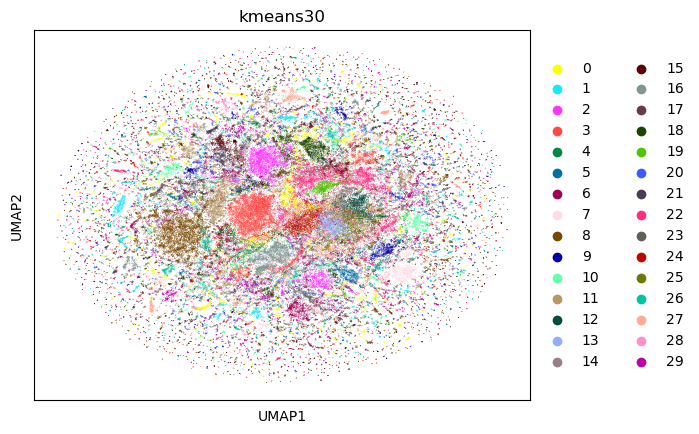

In [18]:
sc.pl.umap(data, color=['kmeans30'])

In [29]:
data.obs['kmeans30']

external_id
SRR1557112     2
SRR1557113    12
SRR1557114     2
SRR1557115    12
SRR1557116    12
              ..
SRR5445513     6
SRR5445514     6
SRR5445515    20
SRR5445516    20
SRR5445517    20
Name: kmeans30, Length: 205297, dtype: category
Categories (30, object): ['0', '1', '2', '3', ..., '26', '27', '28', '29']

In [30]:
# extract and export clusterered datasets 
for i in range(num_clusters):
    new_data = data[data.obs[f"kmeans{num_clusters}"] == str(i)]
    print(new_data.shape)
    new_data.write_h5ad(f"recount3/kmeans{num_clusters}/preprocessed_mouse_gene2vec_15117_compatible_bulk_only_cluster_{i}.h5ad")
    

(11062, 15117)
(6524, 15117)
(9772, 15117)
(14785, 15117)
(5032, 15117)
(4404, 15117)
(9191, 15117)
(3647, 15117)
(16386, 15117)
(4762, 15117)
(6386, 15117)
(8379, 15117)
(3254, 15117)
(2842, 15117)
(2952, 15117)
(10581, 15117)
(8621, 15117)
(6324, 15117)
(10729, 15117)
(3066, 15117)
(4382, 15117)
(2443, 15117)
(13687, 15117)
(1172, 15117)
(5351, 15117)
(4851, 15117)
(5914, 15117)
(10951, 15117)
(1650, 15117)
(6197, 15117)


In [ ]:
# import hdbscan

In [ ]:
# X_pca = data.obsm['X_pca'] 
# hdbcluster = hdbscan.HDBSCAN()
# hdbcluster.fit(X_pca)
# data.obs['hdbcluster'] = hdbcluster.labels_.astype(str)

In [ ]:
# sc.pl.umap(data, color=['hdbcluster'])

## Cluster Pairs

Extract `n` random pairs of clusters and creates + writes `n` corresponding subdatasets for scouts.

In [23]:
import scanpy as sc
from itertools import combinations
from random import sample
import random

In [ ]:
seed = 132
random.seed(seed)
n = 30
pair_nums = sample(list(combinations(range(1,n),2)),100)

In [20]:
data1 = sc.read_h5ad(f"recount3/kmeans30/preprocessed_mouse_gene2vec_15117_compatible_bulk_only_cluster_2.h5ad")
data2 = sc.read_h5ad(f"recount3/kmeans30/preprocessed_mouse_gene2vec_15117_compatible_bulk_only_cluster_6.h5ad")
data_combined = data1.concatenate(data2)
data_combined

/home/kli3/.conda/envs/scbert/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 18963 × 15117
    obs: 'Sample ID', 'project', 'pattern.predict.type', 'study', 'n_genes', 'kmeans30', 'batch'
    var: 'Ensemble ID'
    obsm: 'X_pca', 'X_umap'

In [21]:
data_combined.obs

,Sample ID,project,pattern.predict.type,study,n_genes,kmeans30,batch
external_id,,,,,,,
SRR1557112-0,SRR1557112,1,rna-seq,SRP045763,26577,2,0
SRR1557114-0,SRR1557114,1,rna-seq,SRP045763,27029,2,0
SRR5009720-0,SRR5009720,41,rna-seq,SRP093263,21473,2,0
SRR7751505-0,SRR7751505,77,rna-seq,SRP158763,24362,2,0
DRR014831-0,DRR014831,129,rna-seq,DRP001314,33761,2,0
...,...,...,...,...,...,...,...
SRR7217398-1,SRR7217398,10077,rna-seq,SRP148959,24575,6,1
SRR7217399-1,SRR7217399,10077,rna-seq,SRP148959,24560,6,1
SRR5445512-1,SRR5445512,10087,rna-seq,SRP103859,31751,6,1


In [ ]:
# writes the subdatasets to disk, where each subdataset contains data from a pair of clusters

for i in range(len(pair_nums)):
    data1 = sc.read_h5ad(f"recount3/kmeans30/preprocessed_mouse_gene2vec_15117_compatible_bulk_only_cluster_{pair_nums[i][0]}.h5ad")
    data2 = sc.read_h5ad(f"recount3/kmeans30/preprocessed_mouse_gene2vec_15117_compatible_bulk_only_cluster_{pair_nums[i][1]}.h5ad")
    data_combined = data1.concatenate(data2)
    data_combined.write_h5ad(f"recount3/kmeans30/pairs/preprocessed_mouse_gene2vec_15117_compatible_bulk_only_seed_{seed}_pair_{i}.h5ad")